# Pengolahan Data

In [2]:
import pandas as pd

df = pd.read_csv('..\dataset\water_potability.csv')

# Rename ke bahasa Indonesia, supaya lebih mudah dipahami
df = df.rename(columns={
    'ph': 'pH',
    'Hardness': 'Kesadahan',
    'Solids':'Padatan Terlarut',
    'Chloramines': 'Kloramine',
    'Sulfate': 'Sulfat',
    'Conductivity': 'Konduktivitas',
    'Organic_carbon': 'Karbon Organik',
    'Trihalomethanes': 'Trihalometana',
    'Turbidity': 'Kekeruhan',
    'Potability':'Kelayakan Minum'
})

df

,pH,Kesadahan,Padatan Terlarut,Kloramine,Sulfat,Konduktivitas,Karbon Organik,Trihalometana,Kekeruhan,Kelayakan Minum
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
print(f"Ukuran Dataset: {df.shape}")
print(f"Tak Layak Minum: {df[df['Kelayakan Minum'] == 0].shape}")
print(f"Layak Minum: {df[df['Kelayakan Minum'] == 1].shape}")

Ukuran Dataset: (3276, 10)
Tak Layak Minum: (1998, 10)
Layak Minum: (1278, 10)


## Keterangan Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pH                2785 non-null   float64
 1   Kesadahan         3276 non-null   float64
 2   Padatan Terlarut  3276 non-null   float64
 3   Kloramine         3276 non-null   float64
 4   Sulfat            2495 non-null   float64
 5   Konduktivitas     3276 non-null   float64
 6   Karbon Organik    3276 non-null   float64
 7   Trihalometana     3114 non-null   float64
 8   Kekeruhan         3276 non-null   float64
 9   Kelayakan Minum   3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

,pH,Kesadahan,Padatan Terlarut,Kloramine,Sulfat,Konduktivitas,Karbon Organik,Trihalometana,Kekeruhan,Kelayakan Minum
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Pembersihan data
dengan menghapus beberapa data yang hilang

Visualisasi data yang hilang

pH: 491
Sulfat: 781
Trihalometana: 162


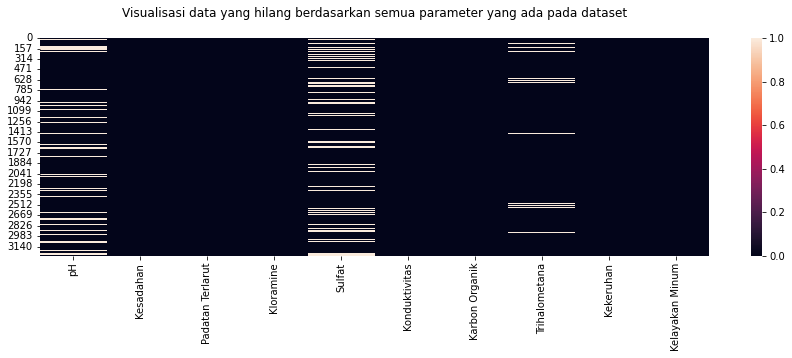

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))
plt.title('Visualisasi data yang hilang berdasarkan semua parameter yang ada pada dataset\n')
_ = sns.heatmap(df.isna())

for key, value in df.isna().sum().to_dict().items():
    if value != 0:
        print(f"{key}: {value}")

Pembersihan data yang hilang dengan menggantinya dengan rata-rata data dari data yang hilang pada dataset

In [7]:
import numpy as np

df_null = df.isna().any()
df_null = df_null.to_dict()
for key, value in df_null.items():
    if value:
        df[key] = df[key].replace(np.nan, df[key].mean())      
df

,pH,Kesadahan,Padatan Terlarut,Kloramine,Sulfat,Konduktivitas,Karbon Organik,Trihalometana,Kekeruhan,Kelayakan Minum
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [8]:
df.describe()

,pH,Kesadahan,Padatan Terlarut,Kloramine,Sulfat,Konduktivitas,Karbon Organik,Trihalometana,Kekeruhan,Kelayakan Minum
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Seleksi Outlier

In [9]:
_cols = df.describe().loc[['max'], :].T.sort_values('max').T.columns

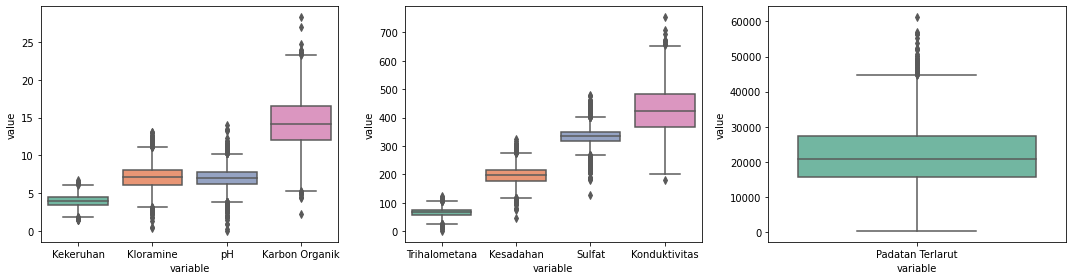

In [10]:
_, ax = plt.subplots(1,3, figsize=(15,4))
sns.boxplot(x="variable", y="value", data=pd.melt(df[_cols[1:5]]), ax=ax[0])
sns.boxplot(x="variable", y="value", data=pd.melt(df[_cols[5:9]]), ax=ax[1])
sns.boxplot(x="variable", y="value", data=pd.melt(df[_cols[9:10]]), ax=ax[2])
plt.tight_layout()
plt.show()

In [11]:
# Removing outliers using IQR method (Inter Quartile Range) -> best practice

# before removing outliers
print(f"Before removing outliers: {df.shape}")

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3-Q1

df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

# after removing outliers
print(f"After removing outliers: {df.shape}")

Before removing outliers: (3276, 10)
After removing outliers: (2666, 10)


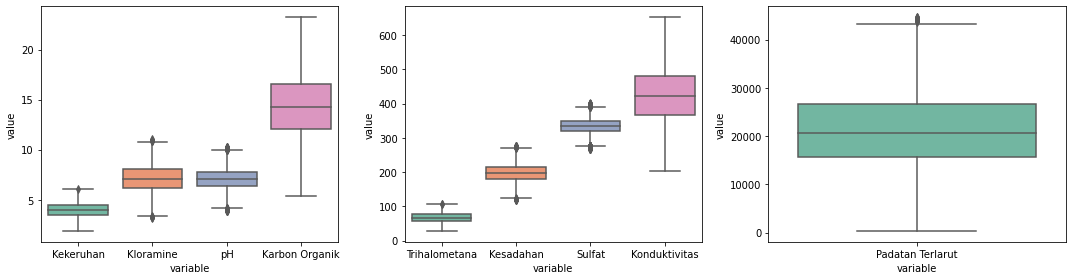

In [12]:
_, ax = plt.subplots(1,3, figsize=(15,4))
sns.boxplot(x="variable", y="value", data=pd.melt(df[_cols[1:5]]), ax=ax[0])
sns.boxplot(x="variable", y="value", data=pd.melt(df[_cols[5:9]]), ax=ax[1])
sns.boxplot(x="variable", y="value", data=pd.melt(df[_cols[9:10]]), ax=ax[2])
plt.tight_layout()
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pH                2666 non-null   float64
 1   Kesadahan         2666 non-null   float64
 2   Padatan Terlarut  2666 non-null   float64
 3   Kloramine         2666 non-null   float64
 4   Sulfat            2666 non-null   float64
 5   Konduktivitas     2666 non-null   float64
 6   Karbon Organik    2666 non-null   float64
 7   Trihalometana     2666 non-null   float64
 8   Kekeruhan         2666 non-null   float64
 9   Kelayakan Minum   2666 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 229.1 KB


In [14]:
df.describe()

,pH,Kesadahan,Padatan Terlarut,Kloramine,Sulfat,Konduktivitas,Karbon Organik,Trihalometana,Kekeruhan,Kelayakan Minum
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,7.073543,197.051982,21486.829049,7.111191,333.760806,425.811207,14.305441,66.438348,3.961669,0.373218
std,1.215541,28.366547,7924.092724,1.413403,26.505571,79.988085,3.217070,14.898566,0.760980,0.483750
min,3.902476,118.988579,320.942611,3.194969,267.202392,201.619737,5.362371,27.559355,1.872573,0.000000
25%,6.348026,179.010144,15596.765222,6.188575,319.481628,365.641745,12.082883,56.915951,3.439135,0.000000
50%,7.080795,197.561474,20583.142637,7.114169,333.775777,421.320293,14.219418,66.396293,3.945844,0.000000
75%,7.792306,215.744047,26742.195037,8.053054,347.921235,481.446065,16.575501,76.628761,4.494523,1.000000
max,10.252816,275.886513,44652.363872,11.086526,400.274579,652.537592,23.234326,106.371720,6.083772,1.000000


In [15]:
df_imbalance = df['Kelayakan Minum'].value_counts()
df_imbalance.index = ['Tak Layak Minum', 'Layak Minum']
df_imbalance

Tak Layak Minum    1671
Layak Minum         995
Name: Kelayakan Minum, dtype: int64

In [16]:
from sklearn.utils import resample

# Resample dataset supaya balance
df_layak0 = df[df['Kelayakan Minum']==0]
df_layak1 = df[df['Kelayakan Minum']==1]

df_layak1_resample = resample(df_layak1, replace=True, n_samples=df['Kelayakan Minum'].value_counts()[0], random_state=123)

df = pd.concat([df_layak0, df_layak1_resample])

In [17]:
df_balance = df['Kelayakan Minum'].value_counts()
df_balance.index = ['Tak Layak Minum', 'Layak Minum']
df_balance

Tak Layak Minum    1671
Layak Minum        1671
Name: Kelayakan Minum, dtype: int64

In [18]:
feature = df.drop('Kelayakan Minum', axis=1).values
target = df['Kelayakan Minum'].values

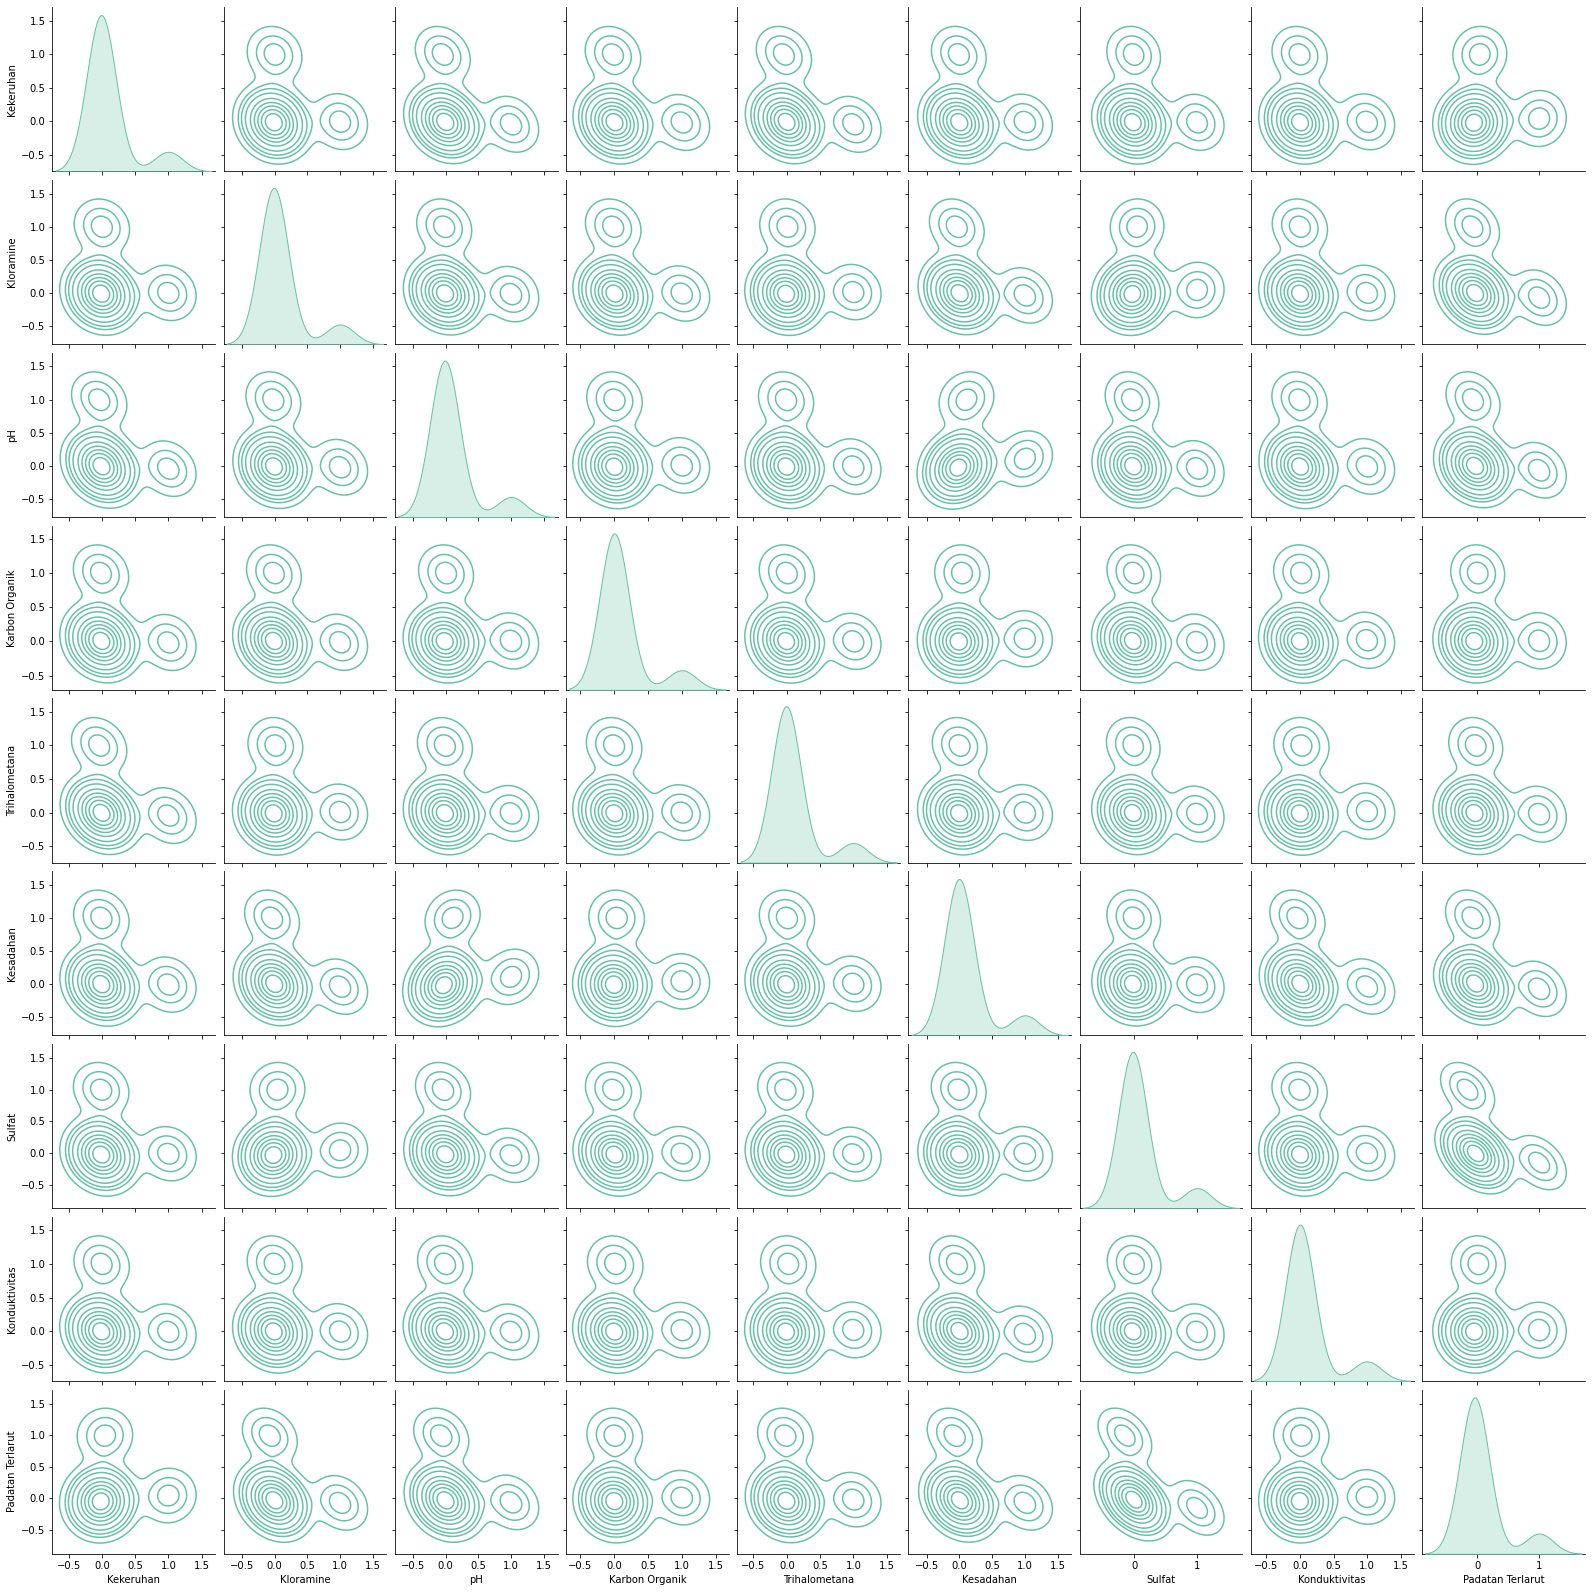

In [40]:
sns.pairplot(df[_cols[1:]].corr(), kind='kde')

In [20]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
feature = scale.fit_transform(feature)

In [46]:
# Save to joblib
import joblib

joblib.dump(feature, '../dataset/feature')
joblib.dump(target, '../dataset/target')

['../dataset/target']

# Machine Learning

Sebelum di optimasi

In [ ]:
from sklearn.model_selection import cross_validate, RepeatedKFold
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

cv = RepeatedKFold(n_splits=10, n_repeats=5)

models = {
    "LR": LogisticRegression(),
    "SVM": SVC(),
    'KNN': KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGB': XGBClassifier(),
    'NB': GaussianNB()
}

names = []
scoring = ['accuracy', 'precision', 'recall', 'f1']
accuracy, precision, recall, f1 = [[] for i in range(len(scoring))]

for name, model in models.items():
    names.append(name)

    scores = cross_validate(model, feature, target, cv=cv, scoring=scoring)

    accuracy.append(scores['test_accuracy'].mean())
    precision.append(scores['test_precision'].mean())
    recall.append(scores['test_recall'].mean())
    f1.append(scores['test_f1'].mean())


KeyboardInterrupt



In [23]:
results_df = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
}, index=names).sort_values(by='Accuracy', ascending=True)

results_df.sort_values(by='Accuracy', ascending=False)

,Train Score,Test Score
LR,0.508418,0.494768
NB,0.572016,0.530643
AdaBoost,0.644594,0.585949
KNN,0.763936,0.654709
SVM,0.741489,0.678625
DT,1.000000,0.754858
XGB,0.999626,0.775785
RF,1.000000,0.852018


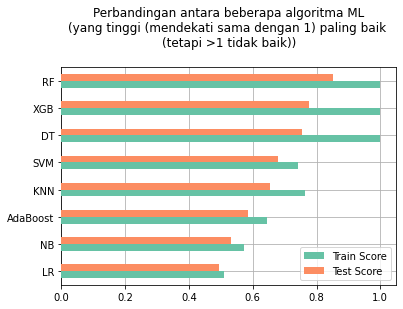

In [26]:
_, ax = plt.subplots(figsize=(8,9))

results_df.plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
_ = ax.set_title(
    "Perbandingan antara beberapa algoritma ML\n(yang tinggi (mendekati sama dengan 1) paling baik \n(tetapi >1 tidak baik))\n")